# Image Classifier with CNN

#### Import libraries for preprocessing data

In [58]:
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
import numpy as np
from glob import glob
from PIL import ImageFile
import random
from tqdm import tqdm
from keras.preprocessing import image
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

random.seed(340958234985)
np.random.seed(2093846)

#### Load data from files

In [59]:
image_names = [item.replace('images/', '') for item in sorted(glob("images/*/"))]
number_of_image_categories = len(image_names)
print('%d image categories.' % number_of_image_categories)
print('Three categories:')
print(image_names[:3])

def load_dataset(path):
    data = load_files(path)
    image_files = np.array(data['filenames'])
    image_targets = np_utils.to_categorical(np.array(data['target']), number_of_image_categories)
    return image_files, image_targets


image_files, image_targets = load_dataset('images')

trains_validate_files, test_files, trains_validate_targets, test_targets = \
    train_test_split(image_files, image_targets, test_size=0.2, random_state=42)

train_files, valid_files, train_targets, valid_targets = \
    train_test_split(trains_validate_files, trains_validate_targets, test_size=0.25, random_state=42)

image_names = [item[20:-1] for item in sorted(glob("images/*/"))]

print('%s images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('%d training images.' % len(train_files))
print('%d validation images.' % len(valid_files))
print('%d test images.'% len(test_files))

5 image categories.
Three categories:
['images\\Apple Braeburn\\', 'images\\Apple Crimson Snow\\', 'images\\Apple Golden 1\\']
2401 images.

1440 training images.
480 validation images.
481 test images.


#### Define function for preprocessing images

In [60]:
def path_to_tensor(img_path):

    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img)

    return np.expand_dims(img_array, axis=0)

def paths_to_tensor(img_paths):
    
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

#### Preprocess images

In [61]:
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████████████████████████████████████████████████████████████████████████| 481/481 [00:00<00:00, 1544.62it/s]


#### Define neural network model

In [62]:
model = Sequential()

model.add(Conv2D(filters=4, kernel_size=2, padding='same',
                 activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=8, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

model.add(Conv2D(filters=12, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(5, activation='softmax'))


model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 100, 100, 4)       52        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 4)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 8)         136       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 8)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 12)        396       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 12)        0         
__________

#### Train the model with training and validating images

In [17]:
epochs = 5

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.image_classifier.hdf5',
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=64, callbacks=[checkpointer], verbose=1)

Train on 1440 samples, validate on 480 samples
Epoch 1/5
1440/1440 [==============================] - ETA: 4s - loss: 0.4812 - acc: 0.859 - ETA: 4s - loss: 0.5360 - acc: 0.835 - ETA: 3s - loss: 0.5336 - acc: 0.822 - ETA: 3s - loss: 0.5106 - acc: 0.820 - ETA: 3s - loss: 0.5002 - acc: 0.825 - ETA: 3s - loss: 0.4769 - acc: 0.835 - ETA: 3s - loss: 0.4641 - acc: 0.837 - ETA: 2s - loss: 0.4572 - acc: 0.837 - ETA: 2s - loss: 0.4556 - acc: 0.835 - ETA: 2s - loss: 0.4536 - acc: 0.831 - ETA: 2s - loss: 0.4485 - acc: 0.833 - ETA: 2s - loss: 0.4439 - acc: 0.834 - ETA: 1s - loss: 0.4388 - acc: 0.832 - ETA: 1s - loss: 0.4310 - acc: 0.835 - ETA: 1s - loss: 0.4233 - acc: 0.839 - ETA: 1s - loss: 0.4129 - acc: 0.845 - ETA: 1s - loss: 0.4098 - acc: 0.843 - ETA: 0s - loss: 0.4038 - acc: 0.846 - ETA: 0s - loss: 0.3980 - acc: 0.849 - ETA: 0s - loss: 0.3902 - acc: 0.849 - ETA: 0s - loss: 0.3841 - acc: 0.850 - ETA: 0s - loss: 0.3806 - acc: 0.850 - 5s 4ms/step - loss: 0.3791 - acc: 0.8507 - val_loss: 0.2356 - 

#### Show result on testing set

In [33]:
model.load_weights('saved_models/weights.best.image_classifier.hdf5')

predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 100.0000%


Train on 1440 samples, validate on 480 samples
Epoch 1/5
1440/1440 [==============================] - ETA: 1s - loss: 0.0411 - acc: 0.992 - ETA: 0s - loss: 0.5522 - acc: 0.871 - 3s 2ms/step - loss: 0.5114 - acc: 0.8813 - val_loss: 0.0355 - val_acc: 0.9979

Epoch 00001: val_loss improved from inf to 0.03548, saving model to saved_models/weights.best.image_classifier.hdf5
Epoch 2/5
1440/1440 [==============================] - ETA: 0s - loss: 0.0545 - acc: 0.993 - ETA: 0s - loss: 0.0457 - acc: 0.995 - 2s 1ms/step - loss: 0.0449 - acc: 0.9958 - val_loss: 0.0322 - val_acc: 0.9958

Epoch 00002: val_loss improved from 0.03548 to 0.03223, saving model to saved_models/weights.best.image_classifier.hdf5
Epoch 3/5
1440/1440 [==============================] - ETA: 1s - loss: 0.0429 - acc: 0.992 - ETA: 0s - loss: 0.0382 - acc: 0.994 - 2s 1ms/step - loss: 0.0378 - acc: 0.9944 - val_loss: 0.0247 - val_acc: 0.9979

Epoch 00003: val_loss improved from 0.03223 to 0.02473, saving model to saved_models/we

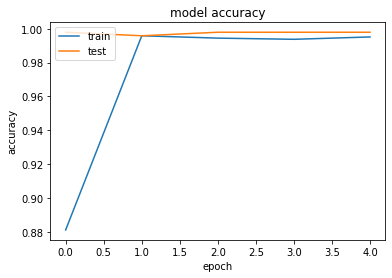

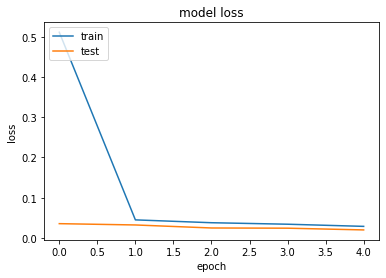

In [63]:
model.load_weights('saved_models/weights.best.image_classifier.hdf5')

epochs = 5

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.image_classifier.hdf5',
                               verbose=1, save_best_only=True)

history = model.fit(train_tensors, train_targets, validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=660, callbacks=[checkpointer], verbose=1)

print(history.history.keys())

import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()